In [48]:
import SimpleITK as sitk
import numpy as np
from monai.transforms import (Compose, 
                              Rotate, 
                              RandStdShiftIntensity,
                              RandHistogramShift, 
                              RandFlip, 
                              Randomizable, 
                              RandScaleIntensity,
                              RandAdjustContrast,
                              RandGaussianSmooth,
                              RandRotate,
                              RandAffineGrid,
                              RandZoom)

class RandomTransform(Randomizable):
    def __init__(self):
        super().__init__()

    def __call__(self, image):
        self.set_random_state(seed=np.random.randint(0, 10000))
        transform = Compose([
            # vanilla transforms
            ## intensity
            RandStdShiftIntensity(prob=0.5, factors=1),
            RandHistogramShift(prob=0.5),
            RandScaleIntensity(prob=0.5,  factors=1),
            RandAdjustContrast(prob=0.5),
            ## spatial
            RandFlip(prob=0.5),
            RandZoom(prob=0.5, min_zoom=0.8, max_zoom=1.1),
        ])
        return transform(image)

# An internal loop is used within the comprehensive list to apply NUM_TRANSFORMATIONS transformations to each image.
# The Sitk.GetarrayFromimage function is used to convert each image into an array number, which is then moved to the RandomTransform.
# Finally, the Sitk.GetimageFromarray function is used to convert the resulting array number in a Simpleitk image.
def augment(image_files, num_transformations=10):
    images = [sitk.ReadImage(file) for file in image_files]

    augmented_images = [
        sitk.GetImageFromArray(
            RandomTransform()(sitk.GetArrayFromImage(image))
        )
        for image in images
        for _ in range(num_transformations)
    ]

    return augmented_images

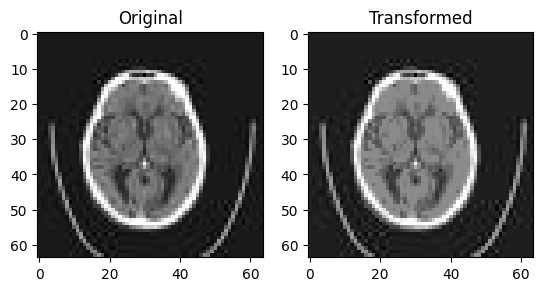

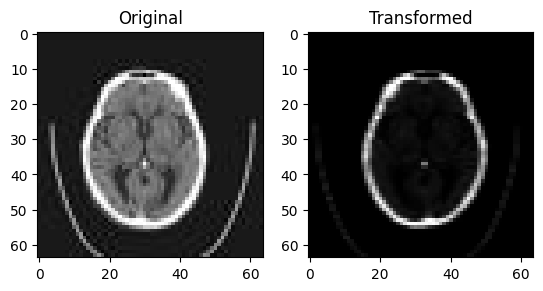

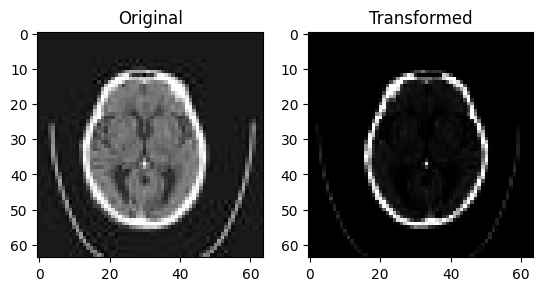

In [49]:
import matplotlib.pyplot as plt

image_files = ['000000.jpeg']
original_0 = sitk.GetArrayFromImage(sitk.ReadImage("000000.jpeg"))

augmented_images = augment(image_files, 3)

for i, augmented_image in enumerate(augmented_images[:20]):
  augmented_original_0 = sitk.GetArrayFromImage(augmented_image)
  # Plot the images using matplotlib
  fig, ax = plt.subplots(1, 2)
  ax[0].imshow(original_0, cmap='gray')
  ax[0].set_title('Original')
  ax[1].imshow(augmented_original_0, cmap='gray')
  ax[1].set_title('Transformed')
  plt.show()


In [53]:
import unittest
class TestAugment(unittest.TestCase):
    def test_no_num_transform(self):
        # If not specific a number of transformations, expect 10 transformations per image
        image_files = ['000000.jpeg', '000001.jpeg']
        self.assertEqual(len(augment(image_files)), 20)

    def test_w_num_transform(self):
        image_files = ['000000.jpeg', '000001.jpeg']
        self.assertEqual(len(augment(image_files,5)), 10)
    

In [55]:
unittest.main(argv=[''], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.154s

OK
